# Instituto Tecnológico y de Estudios Superiores de Monterrey
## Maestría en Inteligencia Artificial Aplicada
### Proyecto Integrador (Gpo 10) - TC5035.10

### **Proyecto: Diseño Acelerado de Fármacos**

### Avance 5: Modelo final

#### **Docentes:**
- Dra. Grettel Barceló Alonso - Profesor Titular
- Dr. Luis Eduardo Falcón Morales - Profesor Titular
- Dr. Horacio Martinez Alfaro  – Profesor Tutor

#### **Miembros del equipo:**
 - Jose Luis Artigas Arroyo - A01794906
 - José Luis Fabela Portillo - A00748551
 - Alejandro Emmanuel Silva Ortega - A01794545

# Modelo final

En esta entrega se busca 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import re
import joblib
from preprocess import pfeature_process
import csv
import torch
import yaml
import sys

In [2]:
model_path = '../models/dtr_model.pkl'
X_vegf = '../data/processed/VEGF.txt'
y_vegf = '../data/processed/VEGF_y.csv'

In [3]:
vegf_true = pd.read_csv(y_vegf)

In [4]:
model = joblib.load(model_path)

In [5]:
vegf_seqs = pfeature_process(X_vegf)
vegf_seqs

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
RGLRRLGRKIAHGVKKYGPTVLRIIRIA,3.685827,3.026574,2.174209,1.114199,-3.148683,1.174767,0.390196,1.512147,0.796227,-0.303206,-1.240757,-1.283147,-0.087252,-0.094193,0.287308,-2.999834,0.984064,-0.310411
KWKLFKKIGIGKFLHSAKKF,-2.961536,3.889708,1.755504,2.560073,-2.761317,-0.973730,-1.418199,-0.397591,-1.126385,-0.742023,1.497293,-1.226199,1.290707,1.428751,0.420648,-0.454442,-1.256059,-0.383208
KWKLFKKIGPGKFLHSAKKF,-2.981186,3.723922,-0.512336,2.369002,-2.732813,0.358897,-1.931299,0.053117,-2.258698,-1.408579,1.444053,-1.655509,0.576073,1.587953,0.640201,0.452737,-0.485281,-0.055894
KWKLFKKIPKFLHSAKKF,-5.309206,5.248047,0.490025,3.058876,-1.295841,1.110243,-2.395370,-0.526760,-0.824932,-0.283949,1.252813,-1.471735,0.469923,1.488074,0.618040,0.779301,-0.669829,0.258260
GLFDIAKKVIGVIGSL,-2.056033,-8.146810,3.343823,-1.914097,-0.226462,-2.302734,0.882738,0.219526,-1.994380,0.651051,-0.736073,0.172876,0.914814,1.545588,0.942909,-1.648604,-1.119495,0.176648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACSHSGWGCGHGSWSCGRRRRRRRR,2.431572,1.353916,-9.583051,3.140612,-5.032865,-1.859997,5.469694,-3.173150,-1.832779,-0.717738,1.723960,1.366966,0.191277,-1.291578,-0.300778,-1.813377,-0.914407,-1.680822
ACHGRRWGCGRHRGRCG,-2.808445,-0.724574,-5.235644,1.688485,-4.167980,-3.131834,0.483101,0.902839,-0.177347,0.515799,2.838837,2.812539,-0.720620,-1.774664,-1.997905,-0.916444,-0.860861,0.027563
GLFGCGRKKRRQRRRPPQ,-4.776266,4.981262,-5.638631,-1.172772,-0.333940,1.880730,4.872651,0.190700,-1.979738,1.320010,0.529927,1.254141,0.847712,-1.091748,0.434319,0.643068,0.181547,0.803742
KRRRRRRRRRE,-13.361806,15.352664,-8.924242,-2.045379,2.396016,-0.497397,8.399128,-2.932850,-0.499435,1.944272,-1.254200,-1.576396,-1.778543,0.331674,-4.084826,-0.900434,-1.590439,-1.793383


In [6]:
vegf_predict = model.predict(vegf_seqs)
vegf_predict

array([0, 1, 0, ..., 0, 0, 0])

In [13]:

print(vegf_predict)

In [15]:
vegf_report = classification_report(vegf_true,vegf_predict, target_names=['positive','negative'], output_dict=True)
vegf_report

{'positive': {'precision': 0.9925173703901656,
  'recall': 0.6913626209977662,
  'f1-score': 0.815009874917709,
  'support': 2686.0},
 'negative': {'precision': 0.004801920768307323,
  'recall': 0.2222222222222222,
  'f1-score': 0.009400705052878966,
  'support': 18.0},
 'accuracy': 0.6882396449704142,
 'macro avg': {'precision': 0.4986596455792365,
  'recall': 0.4567924216099942,
  'f1-score': 0.412205289985294,
  'support': 2704.0},
 'weighted avg': {'precision': 0.9859423415095467,
  'recall': 0.6882396449704142,
  'f1-score': 0.8096470919822184,
  'support': 2704.0}}

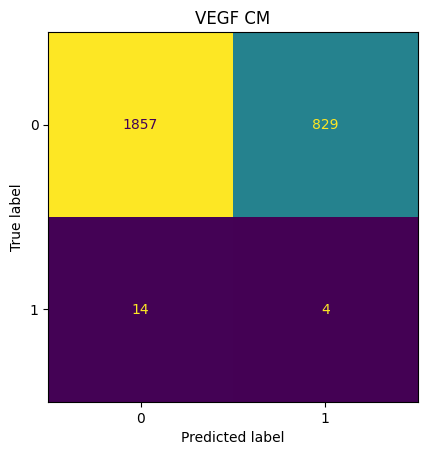

In [9]:
cm_vegf = confusion_matrix(vegf_true, vegf_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_vegf)

disp.plot(colorbar= False)
disp.ax_.set_title('VEGF CM')
plt.show()

# ROC

In [16]:
from sklearn.metrics import roc_curve, auc

In [17]:
vegf_pred_proba = model.predict_proba(vegf_seqs)[:, 1]

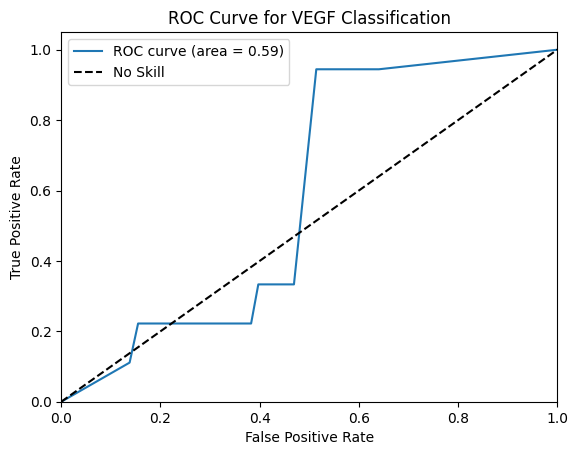

In [18]:
fpr, tpr, thresholds = roc_curve(vegf_true, vegf_pred_proba) 
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for VEGF Classification')
plt.legend()
plt.show()

In [19]:
from sklearn.metrics import precision_recall_curve

Text(0.5, 1.0, 'VEGF Precision-Recall curve')

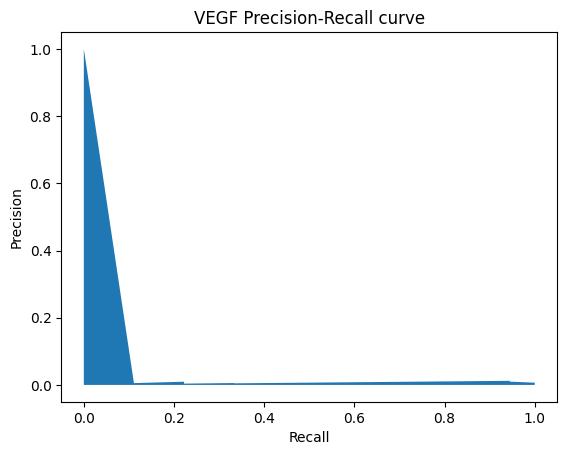

In [20]:
precision, recall, thresholds = precision_recall_curve(vegf_true, vegf_pred_proba)
plt.fill_between(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("VEGF Precision-Recall curve")

In [23]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [29]:
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
dot_data = export_graphviz(model)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

InvocationException: GraphViz's executables not found